In [1]:
import numpy as np
import math


In [2]:
def initParams(a: float, b: float, n: int, diferSecond):
    """
    Иницилизирует начальные данные
    :param a: левая граница
    :param b: правая граница
    :param n: количество разбиений
    :param diferSecond: лямбда второй производной
    :return: Возврашает проинецилизорованые данные
    """
    left_matrix = np.zeros((n, n))
    center_matrix = np.zeros(n)
    right_matrix = np.zeros(n)
    lambda_array = np.zeros(n)
    u_array = np.zeros(n)
    h = (b - a) / n

    x_matrix = np.zeros(n)
    for i in range(n):
        x_matrix[i] = (a + i * h)
    left_matrix[0, 0] = 1
    left_matrix[0, 1] = 0
    left_matrix[- 1, -2] = 0
    left_matrix[- 1, -2] = 1
    right_matrix[0] = diferSecond(a)
    right_matrix[-1] = diferSecond(b)

    return left_matrix, center_matrix, right_matrix, u_array, h, x_matrix, lambda_array


In [3]:
def splainThird(x, m, h, n, value, fun):
    """

    :param x: матрица левая
    :param m: матрица решений
    :param h: шаг
    :param n: количество разбиений
    :param value: искомое значение
    :param fun: исходная функция
    :return: значение сплайна в точке
    """
    index = -1
    for i in range(n - 1):
        if x[i] <= value <= x[i + 1]:
            index = i + 1
            break

    splain_value = (((x[index] - value) ** 3 - (h ** 2) * (x[index] - value)) * m[index - 1]) / (6 * h) + (
            ((value - x[index - 1]) ** 3 - (h ** 2) * (value - x[index - 1])) * m[index]) / (6 * h) + (
                           (x[index] - value) * fun(x[index - 1])) / h + ((value - x[index - 1]) * fun(x[index])) / h
    return splain_value


In [4]:
def calculateSplain(a: float, b: float, n: int,
                    fun, diferSecond):
    """
    Расчет массивов методом прогонки
    :param a: левая граница
    :param b: правая граница
    :param n: количество разбиений
    :param fun: лямбда функция искомой функции
    :param diferSecond: лямбда второй производной
    :return: Матрицу коэффициентов, матрицу решений, количество разбиений, шаг
    """
    left_matrix, center_matrix, right_matrix, u_array, h, x_matrix, lambda_array = initParams(a, b, n,
                                                                                              diferSecond)
    for i in range(1, n - 1):
        left_matrix[i, i - 1] = h / 6  # Присваеваем коэф с
        left_matrix[i, i] = 2 * h / 3  # коэф а
        if i != n - 1:
            left_matrix[i, i + 1] = h / 6  # коэф b

        right_matrix[i] = (fun(x_matrix[i + 1]) - fun(x_matrix[i])) / h - (fun(x_matrix[i]) - fun(x_matrix[i - 1])) / h

    answer = np.linalg.solve(left_matrix, right_matrix)

    return x_matrix, answer, n, h


In [17]:
x_matrix, center_mas, n, h = calculateSplain(a=0.0, b=math.pi*2, n=100, fun=lambda x: math.sin(x), diferSecond=lambda x: -math.sin(x))
spine = splainThird(x_matrix, center_mas, h, n, math.pi/2, fun=lambda x: math.sin(x))
spine

1.0000000000000013

In [15]:
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


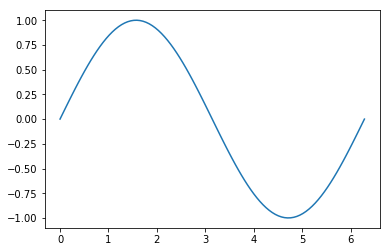

In [36]:
%pylab inline
x = linspace(0, math.pi*2, n)
y = np.zeros(n)
for i in range(n):
    y[i] = splainThird(x_matrix, center_mas, h, n, x[i], fun=lambda x: math.sin(x))
plt.plot(x,y, label='line 1')
plt.show()